***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Spring 2025

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [1]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec

# Watts-Strogatz model

In [2]:
def random_orientation(G): 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    G_di = nx.DiGraph() 
    for e in G.edges():
        U = np.random.rand()
        if U < 1/2: 
            G_di.add_edge(e[0],e[1])
        else:
            G_di.add_edge(e[1],e[0])
    return G_di

def WS(G, p=0.1, random_orientation=False):
    # Watts-Strogatz model with baseline graph G and edge rewiring probability p 
    # G is undirected. Flip fair coins for each edge of G to get initial orientation.
    # For each oriented edge, resample the head node uniformly at random with probability p, independently. 
    # Do nothing for that edge with probability 1-p. 
    
    # Give random orientation by crea
    if random_orientation: 
        G1 = random_orientation(G)
    else: #G is already a digraph 
        G1 = G

    nodes = list(G1.nodes())
    G2 = nx.Graph()
    
    for e in G1.edges():
        U = np.random.rand()
        if U < p: 
            i = np.random.choice(np.arange(len(nodes)))
            v = nodes[i]
            G2.add_edge(e[0],v)
        else: 
            G2.add_edge(e[0],e[1])
    return G2
    

# Barabasi-Albert model

In [6]:
def BA(G0=None, m0=1, m=1, n=100, alpha=1):
    # Barabasi-Albert model with baseline graph G = single node with m0 self-loops 
    # Each new node has m edges pointing to some nodes in the existing graph 
    # alpha=1 -> preferential attachment: The head of each new directed edge is chosen randomly with probability 
    # proportional to the degree
    # alpha=0 ->: Uniform attachment: The head of each new directed edge is chosen uniformly at random
    # alpha \notin\{0,1} -> nonlinear preferential attachment: The head of each new directed edge is chosen 
    # randomly with probability proportional to the degree^alpha
    
    if G0 is not None: 
        G = G0
    else: 
        G = nx.MultiGraph() # baseline graph with a single node and m0 self-loops 
        for i in np.arange(m0):
            G.add_edge(1,1)
        
    for s in np.arange(1,n):
        for j in np.arange(m):
            # form a degree distribution 
            degrees = np.asarray([G.degree(n)**(alpha) for n in G.nodes()])
            deg_dist = degrees*(1/np.sum(degrees))
            v = np.random.choice(G.nodes(), p=deg_dist)
            G.add_edge(s,v)
        
    return G
    

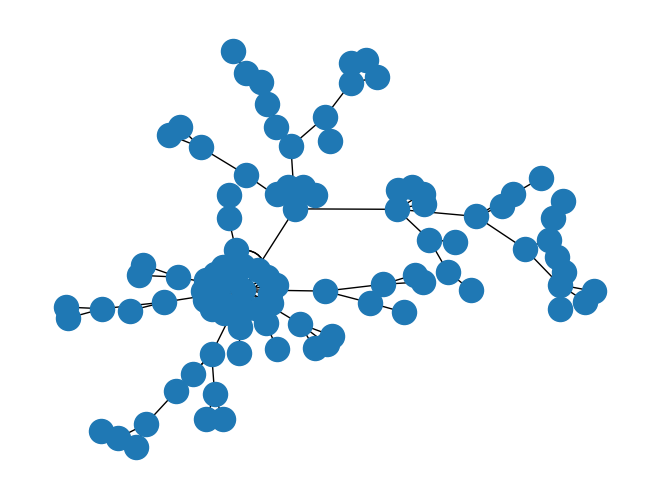

In [9]:
G = BA(alpha=1)
nx.draw(G)

In [10]:
degrees = np.asarray([G.degree(v) for v in G.nodes()])

In [11]:
deg_dist = degrees/np.sum(degrees)

In [12]:
np.sum(deg_dist)

1.0

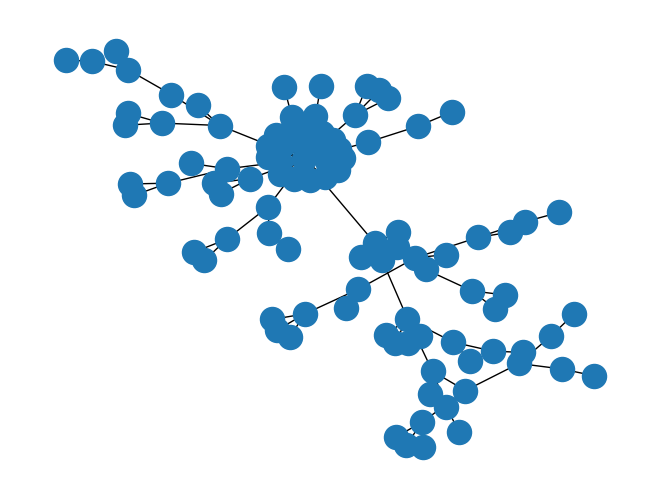

In [13]:
H = nx.Graph()
for e in G.edges():
    H.add_edge(e[0],e[1])

nx.draw(H)

In [14]:
list(G.edges())

[(1, 1),
 (1, 1),
 (1, 2),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 9),
 (1, 11),
 (1, 14),
 (1, 15),
 (1, 17),
 (1, 19),
 (1, 22),
 (1, 23),
 (1, 26),
 (1, 28),
 (1, 32),
 (1, 34),
 (1, 35),
 (1, 44),
 (1, 46),
 (1, 49),
 (1, 56),
 (1, 62),
 (1, 68),
 (1, 72),
 (1, 75),
 (1, 76),
 (1, 77),
 (1, 96),
 (2, 3),
 (2, 8),
 (2, 10),
 (2, 18),
 (2, 29),
 (2, 39),
 (2, 54),
 (3, 4),
 (3, 24),
 (3, 25),
 (3, 36),
 (3, 43),
 (3, 52),
 (4, 33),
 (4, 41),
 (4, 89),
 (10, 12),
 (10, 13),
 (10, 81),
 (12, 65),
 (12, 78),
 (13, 51),
 (13, 58),
 (14, 16),
 (14, 20),
 (16, 57),
 (16, 59),
 (18, 48),
 (19, 21),
 (19, 27),
 (19, 73),
 (21, 87),
 (21, 91),
 (25, 31),
 (25, 45),
 (27, 30),
 (30, 69),
 (30, 82),
 (31, 61),
 (32, 50),
 (32, 80),
 (33, 37),
 (33, 53),
 (34, 40),
 (34, 64),
 (35, 93),
 (37, 38),
 (37, 74),
 (38, 42),
 (41, 47),
 (48, 88),
 (48, 99),
 (50, 55),
 (50, 67),
 (53, 60),
 (53, 70),
 (53, 94),
 (56, 63),
 (58, 79),
 (58, 85),
 (58, 90),
 (62, 66),
 (62, 86),
 (62, 97),
 (63, 92),
 (65, 95),


In [20]:
weights = [0.5 for e in G.edges]

In [21]:
weights

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5

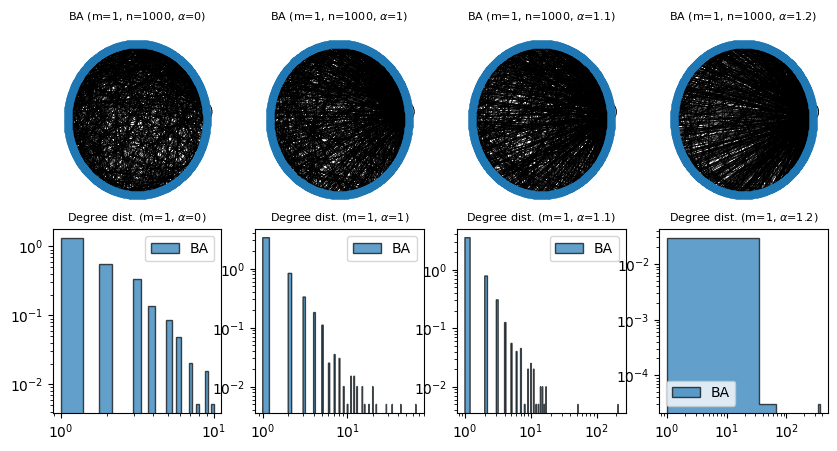

In [22]:
fig = plt.figure(figsize=[10,5], constrained_layout=False)
network_list = [""]
n=1000
m=1
alpha_list = [0, 1, 1.1, 1.2]
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(alpha_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(alpha_list)): 
    G = BA(m0=1, m=m, n=n, alpha=alpha_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for e in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(r"BA (m={}, n={}, $\alpha$={})".format(m, n, alpha_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(r"Degree dist. (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)


plt.savefig("BA_graph_deg", bbox_inches="tight")

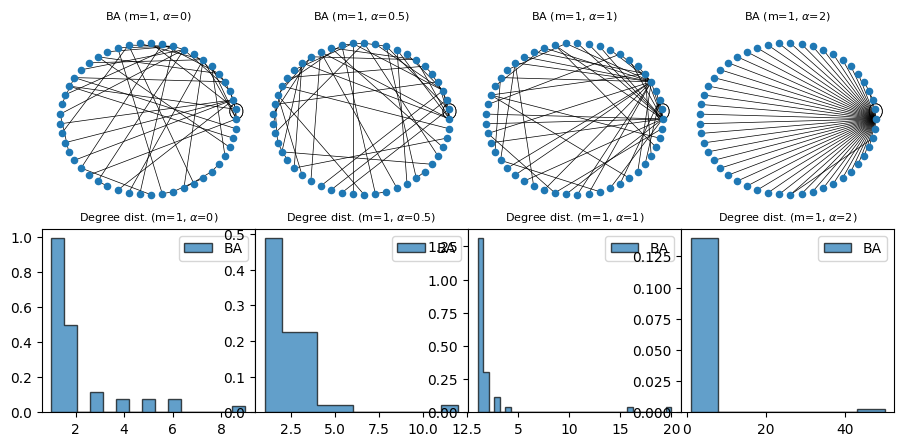

In [23]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
alpha_list=[0, 0.5, 1, 2]
m=1
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(alpha_list), wspace=0, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(alpha_list)): 
    G = BA(m0=1, m=m, n=50, alpha = alpha_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for e in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(r"BA (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title(r"Degree dist. (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)


plt.savefig("BA_graph_alpha_{}".format(m), bbox_inches="tight")

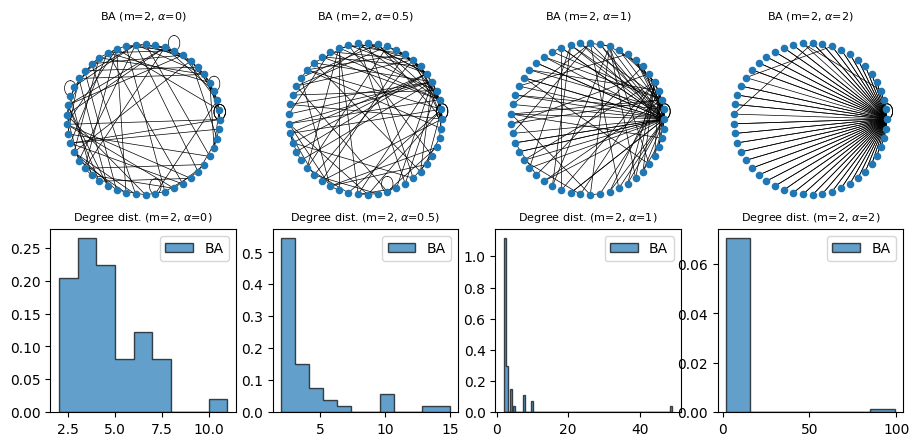

In [24]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
alpha_list=[0, 0.5, 1, 2]
m=2
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(alpha_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(alpha_list)): 
    G = BA(m0=1, m=m, n=50, alpha = alpha_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for e in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(r"BA (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title(r"Degree dist. (m={}, $\alpha$={})".format(m, alpha_list[i]), fontsize=8)


plt.savefig("BA_graph_alpha_{}".format(m), bbox_inches="tight")

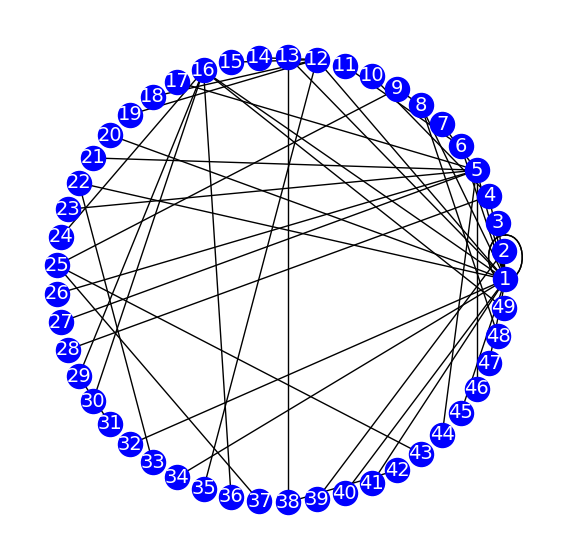

In [25]:
G = BA(m0=1, m=1, n=50)

fig = plt.figure(figsize=[7,7], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G),
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

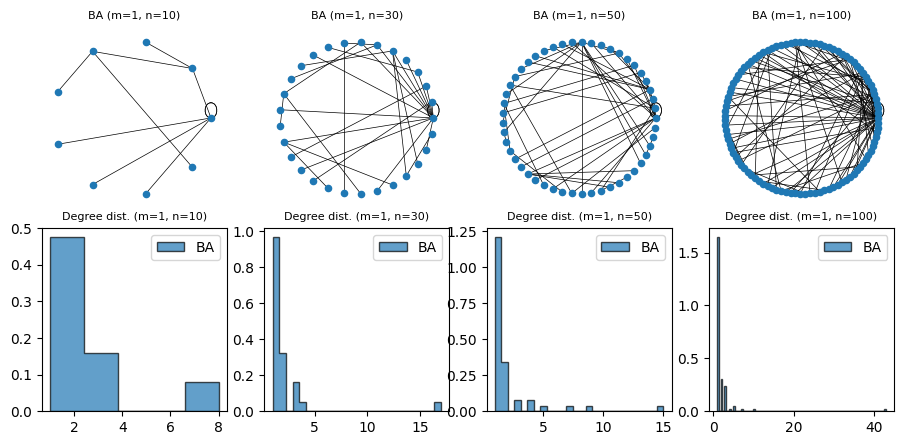

In [26]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_list=[10, 30, 50, 100]
m=1
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(n_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    G = BA(m0=1, m=m, n=n_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title("BA (m={}, n={})".format(m, n_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree dist. (m={}, n={})".format(m, n_list[i]), fontsize=8)


plt.savefig("BA_graph_deg", bbox_inches="tight")

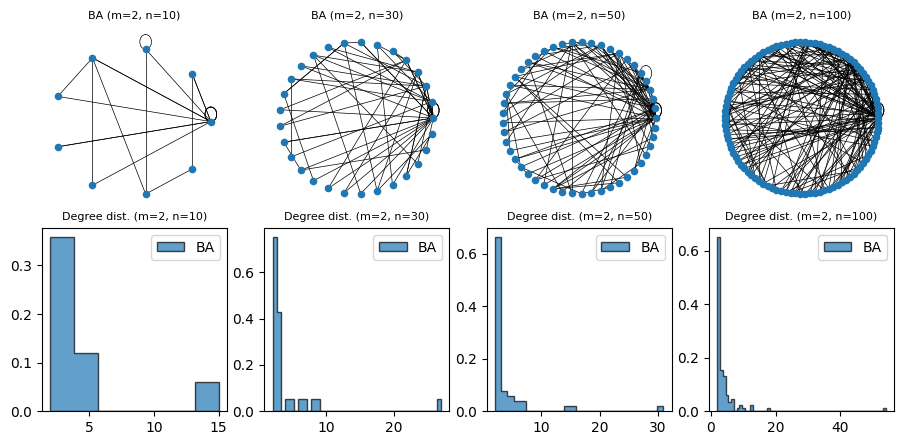

In [110]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_list=[10, 30, 50, 100]
m=2
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(n_list), wspace=0.2, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    G = BA(m0=1, m=m, n=n_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title("BA (m={}, n={})".format(m, n_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree dist. (m={}, n={})".format(m, n_list[i]), fontsize=8)


plt.savefig("BA_graph_deg2", bbox_inches="tight")

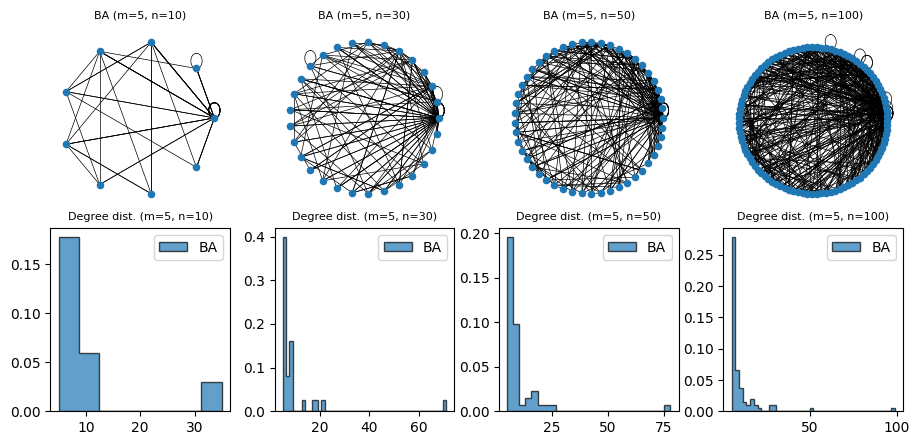

In [27]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
n_list=[10, 30, 50, 100]
m=5
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(n_list), wspace=0.25, hspace=0.1)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    G = BA(m0=1, m=m, n=n_list[i])
    degrees = [G.degree(n) for n in G.nodes()]
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title("BA (m={}, n={})".format(m, n_list[i]), fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(degrees, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    ax.legend()
    ax.set_title("Degree dist. (m={}, n={})".format(m, n_list[i]), fontsize=8)


plt.savefig("BA_graph_deg_{}".format(m), bbox_inches="tight")

# Clustering coefficients of ER, WS, and BA

In [28]:
from tqdm import trange

100%|█████████████████████████████████████████████| 4/4 [00:12<00:00,  3.25s/it]


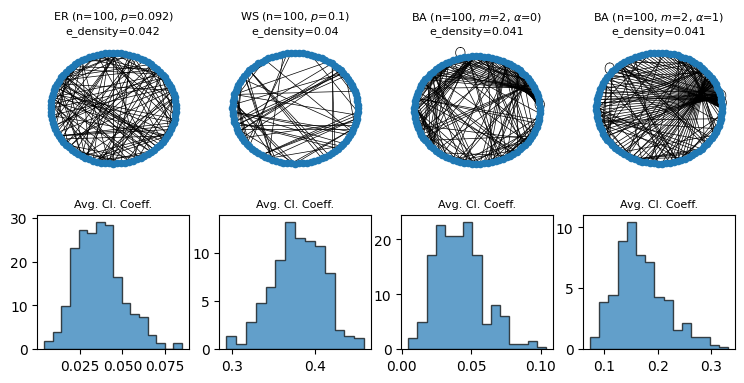

In [29]:
fig = plt.figure(figsize=[9,4], constrained_layout=False)
network_list = [""]
n = 100
m=2
sample_size = 300

outer_grid = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.2, hspace=0.3)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

for i in trange(4): 
    clustering_list = [] 
    path_length_list = []
    for j in np.arange(sample_size):
        
        if i == 0: # ER
            p = 2*np.log(n)/n
            G = nx.erdos_renyi_graph(n=n,p=2*m/(n-1))
            title = r"ER (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 1: # WS
            G0 = nx.circulant_graph(n, [1,2])
            G1 = random_orientation(G0)
            p = 0.1
            G = WS(G1, p=p, random_orientation=False)
            title = r"WS (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 2: # BA with uniform attachment
            G = BA(m0=1, m=m, n=n, alpha = 0)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 0)
        elif i == 3: # BA with preferential attachment
            G = BA(m0=1, m=m, n=n, alpha = 1)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 1)
            
        title = title + "\n" +  "e_density={}".format(np.round(nx.density(G),3))

        # convert multigraph from BA to simple graph
        G00 = nx.Graph()
        for e in G.edges():    
            G00.add_edge(e[0],e[1])
        G = G00
            
        clustering_list.append(nx.average_clustering(G))
        if nx.is_connected(G):
            path_length_list.append(nx.average_shortest_path_length(G))
        else:
            path_length_list.append(0)
    
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(title, fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(clustering_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(r"Avg. Cl. Coeff.", fontsize=8)
    
    #inner_grid2 = outer_grid[2,i].subgridspec(1, 1, wspace=0, hspace=0)
    #ax = fig.add_subplot(inner_grid2[0, 0])
    #ax.hist(path_length_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    #ax.set_title(r"Avg. path length", fontsize=8)

plt.savefig("cl_pl_comparison1", bbox_inches="tight")

100%|█████████████████████████████████████████████| 4/4 [04:28<00:00, 67.16s/it]


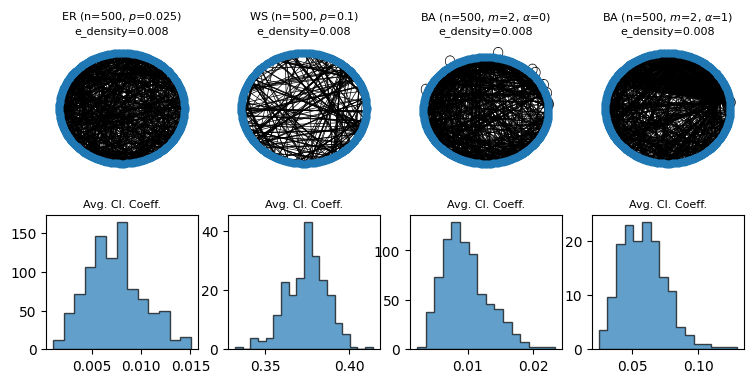

In [30]:
fig = plt.figure(figsize=[9,4], constrained_layout=False)
network_list = [""]
n = 500
m=2
sample_size = 300

outer_grid = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.2, hspace=0.3)

G = nx.MultiGraph() # baseline graph with a single node and a self-loop
G.add_edge(1,1)

for i in trange(4): 
    clustering_list = [] 
    path_length_list = []
    for j in np.arange(sample_size):
        
        if i == 0: # ER
            p = 2*np.log(n)/n
            G = nx.erdos_renyi_graph(n=n,p=2*m/(n-1))
            title = r"ER (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 1: # WS
            G0 = nx.circulant_graph(n, [1,2])
            G1 = random_orientation(G0)
            p = 0.1
            G = WS(G1, p=p, random_orientation=False)
            title = r"WS (n={}, $p$={})".format(n, np.round(p,3))
        elif i == 2: # BA with uniform attachment
            G = BA(m0=1, m=m, n=n, alpha = 0)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 0)
        elif i == 3: # BA with preferential attachment
            G = BA(m0=1, m=m, n=n, alpha = 1)
            title = r"BA (n={}, $m$={}, $\alpha$={})".format(n, m, 1)
            
        title = title + "\n" +  "e_density={}".format(np.round(nx.density(G),3))

        # convert multigraph from BA to simple graph
        G00 = nx.Graph()
        for e in G.edges():    
            G00.add_edge(e[0],e[1])
        G = G00
            
        clustering_list.append(nx.average_clustering(G))
        if nx.is_connected(G):
            path_length_list.append(nx.average_shortest_path_length(G))
        else:
            path_length_list.append(0)
    
    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    #weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.circular_layout(G))
    #ax.legend()
    ax.set_title(title, fontsize=8)

    
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.hist(clustering_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    ax.set_title(r"Avg. Cl. Coeff.", fontsize=8)
    
    #inner_grid2 = outer_grid[2,i].subgridspec(1, 1, wspace=0, hspace=0)
    #ax = fig.add_subplot(inner_grid2[0, 0])
    #ax.hist(path_length_list, bins='auto', alpha=0.7, label='BA', edgecolor="k", histtype='stepfilled', density=True)
    #ax.legend()
    #ax.set_title(r"Avg. path length", fontsize=8)

plt.savefig("cl_pl_comparison2", bbox_inches="tight")